# Machine Learning

## 1) Creando Set de Entrenamiento

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

%matplotlib inline
plt.style.use('default')

In [2]:
#Capitales de los Estados de México
capitales=['Aguascalientes','Mexicali','La Paz','Campeche','Tuxtla Gutiérrez','Chihuahua','Saltillo','Colima','Durango','Guanajuato','Chilpancingo de los Bravo','Pachuca','Guadalajara','Toluca','Morelia','Cuernavaca','Tepic','Monterrey','Oaxaca de Juárez','Puebla','Querétaro','Chetumal','San Luis Potosí','Culiacán','Hermosillo','Villahermosa','Victoria','Tlaxcala','Xalapa','Mérida','Zacatecas','Cuauhtémoc']

In [3]:
#Zonas de Mexico
nor_oeste=['Baja California Sur','Baja California Norte','Chihuahua','Durango','Sinaloa','Sonora']
nor_este=['Coahuila','Nuevo León','Tamaulipas']
occidente=['Nayarit','Jalisco','Colima','Michoacán']
oriente=['Puebla','Veracruz','Tlaxcala','Hidalgo']
centro_norte=['Aguascalientes','Guanajuato','San luis Potosí','Zacatecas','Querétaro']
centro_sur=['Morelos','Edo. de México','Distrito Federal']
sur_oeste=['Guerrero','Oaxaca','Chiapas']
sur_este=['Tabasco','Campeche','Quintana Roo','Yucatán']

In [4]:
#Función que establece si una ciudad se encuentra en la capital del estado
def EstaEnCapital(Ciudad):
    for capital in capitales:
        if(Ciudad==capital):
            return 1
    return 0

In [5]:
def oneHotEncoding(df, columna):
    one_hot = pd.get_dummies(df[columna])
    df.drop(columna, axis=1, inplace=True)
    df = pd.concat([df, one_hot], axis=1)
    return df

In [6]:
#Creamos una función que según el mes y el dia, nos devuelve en que estación se encuentra
def fechaEstacion(mes,dia):
    if((mes==1) | (mes==2)):
        return 'Invierno'
    if(mes==3):
        if(dia<21):
            return 'Invierno'
        if(dia>=21):
            return 'Primavera'
    if((mes==4) | (mes==5)):
        return 'Primavera'
    if(mes==6):
        if(dia<21):
            return 'Primavera'
        if(dia>=21):
            return 'Verano'
    if((mes==7) | (mes==8)):
        return 'Verano'
    if(mes==9):
        if(dia<21):
            return 'Verano'
        if(dia>=21):
            return 'Otonio'
    if((mes==10) | (mes==11)):
        return 'Otonio'
    if(mes==12):
        if(dia<21):
            return 'Otonio'
        if(dia>=21):
            return 'Invierno'

In [7]:
#Función que determina en que Zona está dicha provincia
def EstadoARegion(provincia):
    for ciudad in nor_oeste:
        if(ciudad==provincia):
            return 'NorOeste'
    for ciudad in nor_este:
        if(ciudad==provincia):
            return 'NorEste'
    for ciudad in occidente:
        if(ciudad==provincia):
            return 'Occidente'
    for ciudad in oriente:
        if(ciudad==provincia):
            return 'Oriente'
    for ciudad in centro_norte:
        if(ciudad==provincia):
            return 'Centro_Norte'
    for ciudad in centro_sur:
        if(ciudad==provincia):
            return 'Centr_Sur'
    for ciudad in sur_oeste:
        if(ciudad==provincia):
            return 'SurOeste'
    for ciudad in sur_este:
        if(ciudad==provincia):
            return 'SurEste'

In [8]:
train=pd.read_csv('train.csv')
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [9]:
train.dropna(subset=['tipodepropiedad','provincia'],inplace=True)

In [10]:
#Me quedo con las 30 ciudades con mayor cantidad de propiedades en venta
top_ciudades_cantidad=train['ciudad'].value_counts().head(30).index

In [11]:
#Genero las columnas para las 30 ciudades
for ciudad in top_ciudades_cantidad:
    one_hot = pd.get_dummies(train['ciudad']==ciudad)
    one_hot.drop(columns={False},inplace=True)
    one_hot.rename(columns={True:ciudad},inplace=True)
    train = pd.concat([train, one_hot], axis=1)

In [12]:
distrito=train[(train['provincia']=='Distrito Federal')]
estado=train[(train['provincia']=='Edo. de México')]
jalisco=train[(train['provincia']=='Jalisco')]
queretaro=train[(train['provincia']=='Querétaro')]
nuevo_leon=train[(train['provincia']=='Nuevo León')]
puebla=train[(train['provincia']=='Puebla')]
san_luis=train[(train['provincia']=='San luis Potosí')]
yucatan=train[(train['provincia']=='Yucatán')]
morelos=train[(train['provincia']=='Morelos')]
veracruz=train[(train['provincia']=='Veracruz')]
quintara_roo=train[(train['provincia']=='Quintana Roo')]
chihuahua=train[(train['provincia']=='Chihuahua')]
coahuila=train[(train['provincia']=='Coahuila')]
baja_california_norte=train[(train['provincia']=='Baja California Norte')]
baja_california_sur=train[(train['provincia']=='Baja California Sur')]
sonora=train[(train['provincia']=='Sonora')]
guanajuato=train[(train['provincia']=='Guanajuato')]
guerrero=train[(train['provincia']=='Guerrero')]
hidalgo=train[(train['provincia']=='Hidalgo')]
michoacan=train[(train['provincia']=='Michoacán')]
tamaulipas=train[(train['provincia']=='Tamaulipas')]
durango=train[(train['provincia']=='Durango')]
sinaloa=train[(train['provincia']=='Sinaloa')]
aguascalientes=train[(train['provincia']=='Aguascalientes')]
nayarit=train[(train['provincia']=='Nayarit')]
chiapas=train[(train['provincia']=='Chiapas')]
colima=train[(train['provincia']=='Colima')]
tabasco=train[(train['provincia']=='Tabasco')]
tlaxcala=train[(train['provincia']=='Tlaxcala')]
oaxaca=train[(train['provincia']=='Oaxaca')]
campeche=train[(train['provincia']=='Campeche')]
zacatecas=train[(train['provincia']=='Zacatecas')]

In [13]:
#Por cada provincia devuelvo la latitud promedio
def CambiarLatitud(provincia):
     if(provincia=='Distrito Federal'):
        return distrito['lat'].mean()
     if(provincia=='Edo. de México'):
        return estado['lat'].mean()
     if(provincia=='Jalisco'):
        return jalisco['lat'].mean()
     if(provincia=='Querétaro'):
        return queretaro['lat'].mean()
     if(provincia=='Nuevo León'):
        return nuevo_leon['lat'].mean()
     if(provincia=='Puebla'):
        return puebla['lat'].mean()
     if(provincia=='San luis Potosí'):
        return san_luis['lat'].mean()
     if(provincia=='Yucatán'):
        return yucatan['lat'].mean()
     if(provincia=='Morelos'):
        return morelos['lat'].mean()
     if(provincia=='Veracruz'):
        return veracruz['lat'].mean()
     if(provincia=='Quintana Roo'):
        return quintara_roo['lat'].mean()
     if(provincia=='Chihuahua'):
        return chihuahua['lat'].mean()
     if(provincia=='Coahuila'):
        return coahuila['lat'].mean()
     if(provincia=='Baja California Norte'):
        return baja_california_norte['lat'].mean()
     if(provincia=='Baja California Sur'):
        return baja_california_sur['lat'].mean()
     if(provincia=='Sonora'):
        return sonora['lat'].mean()
     if(provincia=='Guanajuato'):
        return guanajuato['lat'].mean()
     if(provincia=='Guerrero'):
        return guerrero['lat'].mean()
     if(provincia=='Hidalgo'):
        return hidalgo['lat'].mean()
     if(provincia=='Michoacán'):
        return michoacan['lat'].mean()
     if(provincia=='Tamaulipas'):
        return tamaulipas['lat'].mean()
     if(provincia=='Durango'):
        return durango['lat'].mean()
     if(provincia=='Sinaloa'):
        return sinaloa['lat'].mean()
     if(provincia=='Aguascalientes'):
        return aguascalientes['lat'].mean()
     if(provincia=='Nayarit'):
        return nayarit['lat'].mean()
     if(provincia=='Chiapas'):
        return chiapas['lat'].mean()
     if(provincia=='Colima'):
        return colima['lat'].mean()
     if(provincia=='Tabasco'):
        return tabasco['lat'].mean()
     if(provincia=='Tlaxcala'):
        return tlaxcala['lat'].mean()
     if(provincia=='Oaxaca'):
        return oaxaca['lat'].mean()
     if(provincia=='Campeche'):
        return campeche['lat'].mean()
     if(provincia=='Zacatecas'):
        return zacatecas['lat'].mean()
     if(provincia==''):
        return 0

In [14]:
#Por cada provincia devuelvo la longitud promedio
def CambiarLongitud(provincia):
     if(provincia=='Distrito Federal'):
        return distrito['lng'].mean()
     if(provincia=='Edo. de México'):
        return estado['lng'].mean()
     if(provincia=='Jalisco'):
        return jalisco['lng'].mean()
     if(provincia=='Querétaro'):
        return queretaro['lng'].mean()
     if(provincia=='Nuevo León'):
        return nuevo_leon['lng'].mean()
     if(provincia=='Puebla'):
        return puebla['lng'].mean()
     if(provincia=='San luis Potosí'):
        return san_luis['lng'].mean()
     if(provincia=='Yucatán'):
        return yucatan['lng'].mean()
     if(provincia=='Morelos'):
        return morelos['lng'].mean()
     if(provincia=='Veracruz'):
        return veracruz['lng'].mean()
     if(provincia=='Quintana Roo'):
        return quintara_roo['lng'].mean()
     if(provincia=='Chihuahua'):
        return chihuahua['lng'].mean()
     if(provincia=='Coahuila'):
        return coahuila['lng'].mean()
     if(provincia=='Baja California Norte'):
        return baja_california_norte['lng'].mean()
     if(provincia=='Baja California Sur'):
        return baja_california_sur['lng'].mean()
     if(provincia=='Sonora'):
        return sonora['lng'].mean()
     if(provincia=='Guanajuato'):
        return guanajuato['lng'].mean()
     if(provincia=='Guerrero'):
        return guerrero['lng'].mean()
     if(provincia=='Hidalgo'):
        return hidalgo['lng'].mean()
     if(provincia=='Michoacán'):
        return michoacan['lng'].mean()
     if(provincia=='Tamaulipas'):
        return tamaulipas['lng'].mean()
     if(provincia=='Durango'):
        return durango['lng'].mean()
     if(provincia=='Sinaloa'):
        return sinaloa['lng'].mean()
     if(provincia=='Aguascalientes'):
        return aguascalientes['lng'].mean()
     if(provincia=='Nayarit'):
        return nayarit['lng'].mean()
     if(provincia=='Chiapas'):
        return chiapas['lng'].mean()
     if(provincia=='Colima'):
        return colima['lng'].mean()
     if(provincia=='Tabasco'):
        return tabasco['lng'].mean()
     if(provincia=='Tlaxcala'):
        return tlaxcala['lng'].mean()
     if(provincia=='Oaxaca'):
        return oaxaca['lng'].mean()
     if(provincia=='Campeche'):
        return campeche['lng'].mean()
     if(provincia=='Zacatecas'):
        return zacatecas['lng'].mean()
     if(provincia==''):
        return 0

In [15]:
#Guardamos el promedio de las columnas para luego completar los NaNs
mean_antiguedad=train['antiguedad'].mean()
mean_habitaciones=train['habitaciones'].mean()
mean_garages=train['garages'].mean()
mean_banos=train['banos'].mean()
mean_metroscubiertos=train['metroscubiertos'].mean()
mean_metrostotales=train['metrostotales'].mean()
mean_idzona=train['idzona'].mean()

In [16]:
#Cambiamos el tipo de dato de algunas columnas para bajar el uso de memoria
train['antiguedad']=train['antiguedad'].astype('int32',errors='ignore')
train['habitaciones']=train['habitaciones'].astype('int32',errors='ignore')
train['banos']=train['banos'].astype('int32',errors='ignore')
train['gimnasio']=train['gimnasio'].astype('int32',errors='ignore')
train['usosmultiples']=train['usosmultiples'].astype('int32',errors='ignore')
train['piscina']=train['piscina'].astype('int32',errors='ignore')
train['escuelascercanas']=train['escuelascercanas'].astype('int32',errors='ignore')
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype('int32',errors='ignore')

In [17]:
#Llenamos los NaNs con el promedio
train[['antiguedad']]=train[['antiguedad']].fillna(value=mean_antiguedad)
train[['habitaciones']]=train[['habitaciones']].fillna(value=mean_habitaciones)
train[['garages']]=train[['garages']].fillna(value=mean_garages)
train[['banos']]=train[['banos']].fillna(value=mean_banos)
train[['metroscubiertos']]=train[['metroscubiertos']].fillna(value=mean_metroscubiertos)
train[['metrostotales']]=train[['metrostotales']].fillna(value=mean_metrostotales)
train[['idzona']]=train[['idzona']].fillna(value=mean_idzona)

In [18]:
#Hacemos la conversión de fechas
train['Fecha']=pd.to_datetime(train['fecha'])
train.drop(columns={'fecha'},inplace=True)
train['Anio']=train['Fecha'].dt.year
train['Mes']=train['Fecha'].dt.month
train['Dia']=train['Fecha'].dt.day
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,Iztapalapa,Cuajimalpa de Morelos,Tijuana,Hermosillo,Acapulco de Juárez,Ecatepec de Morelos,Fecha,Anio,Mes,Dia
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8.116231,2.0,1.0,...,0,0,0,0,0,0,2015-08-23,2015,8,23
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,0,0,0,0,0,0,2013-06-28,2013,6,28
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,0,0,0,0,0,0,2015-10-17,2015,10,17
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,0,0,0,0,0,2012-03-09,2012,3,9
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.000000,2.0,1.0,...,0,0,0,0,0,0,2016-06-07,2016,6,7


In [19]:
train['Esta_Capital']=train['ciudad'].apply(EstaEnCapital)
train['Esta_Avenida']=train.direccion.str.contains('AV|av|Avenida|avenida')
train[['Esta_Avenida']]=train[['Esta_Avenida']].fillna(value=3)
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,Tijuana,Hermosillo,Acapulco de Juárez,Ecatepec de Morelos,Fecha,Anio,Mes,Dia,Esta_Capital,Esta_Avenida
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8.116231,2.0,1.0,...,0,0,0,0,2015-08-23,2015,8,23,0,True
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,0,0,0,0,2013-06-28,2013,6,28,0,True
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,0,0,0,0,2015-10-17,2015,10,17,0,False
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,0,0,0,2012-03-09,2012,3,9,0,False
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.000000,2.0,1.0,...,0,0,0,0,2016-06-07,2016,6,7,0,False


In [20]:
#Aplicamos las funciones en cuestión
train['Estacion']=train.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)
train['Zona']=train['provincia'].apply(EstadoARegion)

In [21]:
train['lat']=train['provincia'].apply(CambiarLatitud)
train['lng']=train['provincia'].apply(CambiarLongitud)

In [22]:
train = oneHotEncoding(train,'provincia')
train = oneHotEncoding(train,'tipodepropiedad')
train = oneHotEncoding(train,'Estacion')
train = oneHotEncoding(train,'Zona')

In [23]:
train.drop(columns={'direccion','titulo','descripcion','Fecha','id','ciudad','Dia'},inplace=True)
#train.drop(columns={'direccion','titulo','descripcion','Fecha','id','ciudad','Dia','lat','lng'},inplace=True)
train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,Primavera,Verano,Centr_Sur,Centro_Norte,NorEste,NorOeste,Occidente,Oriente,SurEste,SurOeste
0,8.116231,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,0,1,1,0,0,0,0,0,0,0
1,10.000000,3.0,2.0,2.0,268.0,180.0,24514.0,19.359628,-98.826768,0,...,0,1,1,0,0,0,0,0,0,0
2,5.000000,3.0,2.0,2.0,144.0,166.0,48551.0,20.642879,-103.122927,0,...,0,0,0,0,0,0,1,0,0,0
3,1.000000,2.0,1.0,1.0,63.0,67.0,53666.0,19.455335,-98.732556,0,...,0,0,1,0,0,0,0,0,0,0
4,10.000000,2.0,1.0,1.0,95.0,95.0,47835.0,20.642879,-103.122927,0,...,1,0,0,0,0,0,1,0,0,0


In [24]:
train['rango_antiguedad']=pd.cut(train['antiguedad'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
train = oneHotEncoding(train,'rango_antiguedad')
train.drop(columns='antiguedad',inplace=True)
train.head()

,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,...,"(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]"
0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,2.0,268.0,180.0,24514.0,19.359628,-98.826768,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,2.0,144.0,166.0,48551.0,20.642879,-103.122927,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,1.0,63.0,67.0,53666.0,19.455335,-98.732556,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,1.0,95.0,95.0,47835.0,20.642879,-103.122927,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2) Aplicación de Algoritmos

Utilizamos Mean Absolute Error (MAE) para ver la precisión de nuestra preducción, cuya formula es:

<img src="https://miro.medium.com/max/780/1*8DXbECB9pnKxTpIvuVD-vg.png">

In [25]:
datos=train.drop(columns={'precio','Garage','Hospedaje'})
precio=train['precio']
datos.head()

,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,...,"(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]"
0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,2.0,268.0,180.0,24514.0,19.359628,-98.826768,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,2.0,144.0,166.0,48551.0,20.642879,-103.122927,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,1.0,63.0,67.0,53666.0,19.455335,-98.732556,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,1.0,95.0,95.0,47835.0,20.642879,-103.122927,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Preparo el set de Test para ser utilizado por los algoritmos
test_final=pd.read_csv('test.csv')
IDS=test_final[['id']].copy()
test_final['Fecha']=pd.to_datetime(test_final['fecha'])
test_final.drop(columns={'fecha'},inplace=True)
test_final['Anio']=test_final['Fecha'].dt.year
test_final['Mes']=test_final['Fecha'].dt.month
test_final['Dia']=test_final['Fecha'].dt.day
test_final['Esta_Avenida']=test_final.direccion.str.contains('AV|av|Avenida|avenida')
test_final['Esta_Capital']=test_final['ciudad'].apply(EstaEnCapital)

In [27]:
#Relleno los NaNs
test_final[['antiguedad']] = test_final[['antiguedad']].fillna(value=mean_antiguedad)
test_final[['habitaciones']] = test_final[['habitaciones']].fillna(value=mean_habitaciones)
test_final[['garages']] = test_final[['garages']].fillna(value=mean_garages)
test_final[['banos']] = test_final[['banos']].fillna(value=mean_banos)
test_final[['metroscubiertos']] = test_final[['metroscubiertos']].fillna(value=mean_metroscubiertos)
test_final[['metrostotales']] = test_final[['metrostotales']].fillna(value=mean_metrostotales)
test_final[['idzona']] = test_final[['idzona']].fillna(value=mean_idzona)
test_final[['Esta_Avenida']]=test_final[['Esta_Avenida']].fillna(value=3)
test_final[['provincia']]=test_final[['provincia']].fillna('')

In [28]:
for ciudad in top_ciudades_cantidad:
    one_hot = pd.get_dummies(test_final['ciudad']==ciudad)
    one_hot.drop(columns={False},inplace=True)
    one_hot.rename(columns={True:ciudad},inplace=True)
    test_final = pd.concat([test_final, one_hot], axis=1)

In [29]:
#Aplicamos las funciones en cuestión
test_final['Estacion']=test_final.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)
test_final['Zona']=test_final['provincia'].apply(EstadoARegion)

In [30]:
test_final['lat']=test_final['provincia'].apply(CambiarLatitud)
test_final['lng']=test_final['provincia'].apply(CambiarLongitud)

In [31]:
test_final = oneHotEncoding(test_final,'provincia')
test_final = oneHotEncoding(test_final,'tipodepropiedad')
test_final = oneHotEncoding(test_final,'Estacion')
test_final = oneHotEncoding(test_final,'Zona')

In [32]:
test_final.drop(columns={'id','Dia','titulo','ciudad','descripcion','direccion','Fecha',''},inplace=True)
#test_final.drop(columns={'id','Dia','titulo','ciudad','descripcion','direccion','Fecha','lat','lng'},inplace=True)

In [33]:
test_final['rango_antiguedad']=pd.cut(test_final['antiguedad'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
test_final = oneHotEncoding(test_final,'rango_antiguedad')
test_final.drop(columns='antiguedad',inplace=True)
test_final.head()

,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,...,"(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]"
0,3.0,1.54675,4.0,300.0,176.735701,2.423512e+06,19.359628,-98.826768,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.00000,1.0,67.0,67.000000,1.138510e+05,20.857962,-88.811045,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.00000,2.0,87.0,100.000000,2.362000e+04,19.359628,-98.826768,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.00000,2.0,86.0,86.000000,1.293470e+05,16.642686,-98.223929,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.00000,1.0,80.0,76.000000,5.712500e+04,19.455335,-98.732556,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Separamos el set de entrenamiento en set de entrenamiento y de validacion
test_size = 0.33
random_state = 0
datos_train , datos_test, precio_train, precio_test = train_test_split(datos,precio,test_size = test_size,random_state = random_state)

### 2.1) Árboles de Decisión

In [35]:
tree = DecisionTreeRegressor(criterion='mse',random_state=1)

In [36]:
tree.fit(datos_train,precio_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [37]:
prediccion_tree_validacion=tree.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_tree_validacion))

Mean Absolute Error:  807467.3785417925


In [38]:
prediccion_final=tree.predict(test_final)
entregable_tree=IDS[['id']].copy()
entregable_tree['target']=prediccion_final
entregable_tree.set_index('id',inplace=True)
entregable_tree.head()

,target
id,
4941,8900000.0
51775,1950000.0
115253,2060000.0
299321,990000.0
173570,720000.0


In [41]:
entregable_tree.to_csv('ADD_12.csv')

### 2.2) KNN

In [39]:
#Busco el valor de K que nos de el menor error
rango_k = range(1, 60)
metricas=[]

for k in rango_k:
    knn = KNeighborsRegressor(n_neighbors=k,algorithm='kd_tree',metric='manhattan')
    knn.fit(datos_train,precio_train)
    prediccion_knn_validacion=knn.predict(datos_test)
    error=mean_absolute_error(precio_test,prediccion_knn_validacion)
    print('K=',k,'- Mean Absolute Error: ',error)
    metricas.append(error)

K= 1 - Mean Absolute Error:  801618.1116320213
K= 2 - Mean Absolute Error:  754911.7914070891
K= 3 - Mean Absolute Error:  738128.996588109
K= 4 - Mean Absolute Error:  731479.9248404625
K= 5 - Mean Absolute Error:  728646.5476363177
K= 6 - Mean Absolute Error:  726625.9850150587
K= 7 - Mean Absolute Error:  726925.678986181
K= 8 - Mean Absolute Error:  727257.8654151134
K= 9 - Mean Absolute Error:  727988.7321075798
K= 10 - Mean Absolute Error:  729192.115289063
K= 11 - Mean Absolute Error:  730430.1475740535
K= 12 - Mean Absolute Error:  731725.0310408374
K= 13 - Mean Absolute Error:  731961.2559569576
K= 14 - Mean Absolute Error:  733100.2588930309
K= 15 - Mean Absolute Error:  734816.3831435732
K= 16 - Mean Absolute Error:  736580.9491983636
K= 17 - Mean Absolute Error:  737806.8145529419
K= 18 - Mean Absolute Error:  738730.995411498
K= 19 - Mean Absolute Error:  739742.3064589825
K= 20 - Mean Absolute Error:  740679.7666835155
K= 21 - Mean Absolute Error:  741637.3354743402
K= 22

Text(0,0.5,'Error')

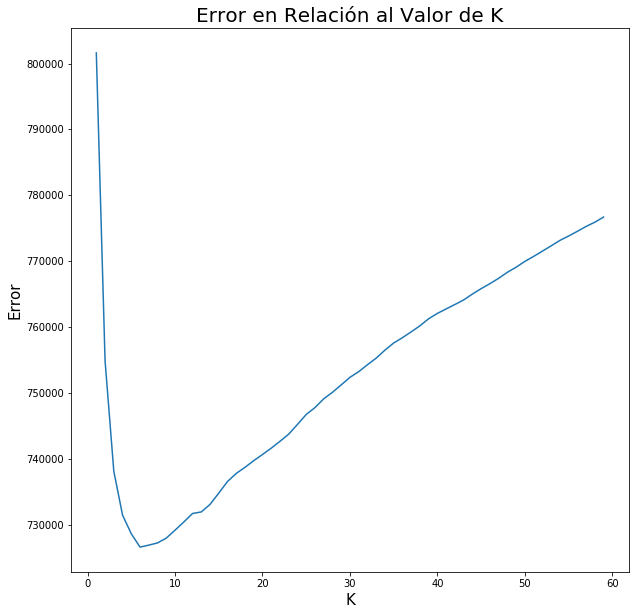

In [40]:
#Ploteamos para ver una mejor representacion
plt.subplots(figsize=(10,10))
plt.plot(rango_k,metricas)
plt.title("Error en Relación al Valor de K",fontsize=20)
plt.xlabel("K",fontsize=15)
plt.ylabel("Error",fontsize=15)

Vemos que entre los valores k=7 hasta 9 tenemos el menor error, por lo que probamos con este último.

In [41]:
knn = KNeighborsRegressor(n_neighbors=6,algorithm='kd_tree',metric='manhattan')

In [42]:
knn.fit(datos_train,precio_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [43]:
prediccion_knn=knn.predict(test_final)

In [44]:
entregable_knn=IDS[['id']].copy()
entregable_knn['target']=prediccion_knn
entregable_knn.set_index('id',inplace=True)
entregable_knn.head()

,target
id,
4941,6.025000e+06
51775,1.119000e+06
115253,1.942500e+06
299321,1.151667e+06
173570,7.358333e+05


In [119]:
entregable_knn.to_csv('KNN_06.csv')

### 2.3) Ada Boosting

In [45]:
ada = AdaBoostRegressor()

In [46]:
ada.fit(datos_train,precio_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [47]:
prediccion_ada_validacion=ada.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_ada_validacion))

Mean Absolute Error:  1803585.0624680973


In [48]:
prediccion_ada=ada.predict(test_final)

In [49]:
entregable_ada=IDS[['id']].copy()
entregable_ada['target']=prediccion_ada
entregable_ada.set_index('id',inplace=True)
entregable_ada.head()

,target
id,
4941,5.959277e+06
51775,1.735369e+06
115253,2.483478e+06
299321,1.735369e+06
173570,1.735369e+06


In [47]:
entregable_ada.to_csv('ADA_01.csv')

### 2.4) Ridge

In [50]:
ridge = Ridge()

In [51]:
ridge.fit(datos_train,precio_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5870507522720558e-20 / 1.1102230246251565e-16
  RuntimeWarning)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
prediccion_ridge_validacion=ridge.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_ridge_validacion))

Mean Absolute Error:  886015.5000363938


### 2.5) Lasso

In [55]:
lasso = Lasso(alpha=1000,positive=True)

In [56]:
lasso.fit(datos_train,precio_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=True, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
prediccion_lasso_validacion=lasso.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_lasso_validacion))

Mean Absolute Error:  896498.550508992


### 2.6) Bagging

In [58]:
bagging = BaggingRegressor(KNeighborsRegressor(n_neighbors=6,algorithm='kd_tree',metric='manhattan'))

In [59]:
bagging.fit(datos_train,precio_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [60]:
prediccion_bagging_validacion=bagging.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_bagging_validacion))

Mean Absolute Error:  720211.4690602556


### 2.7) Extra Tree Regressor

In [61]:
extra_tree = ExtraTreesRegressor(n_estimators=100,criterion='mse',bootstrap=True,n_jobs=-1)

In [62]:
extra_tree.fit(datos_train,precio_train)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
prediccion_extra_tree_validacion=extra_tree.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_extra_tree_validacion))

Mean Absolute Error:  605705.0033170434
